In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append("../src/UBayFS")

from UBaymodel import UBaymodel
from UBayconstraint import UBayconstraint

In [2]:
data = pd.read_csv("./data/simulation/data.csv").values
sc = StandardScaler()
data = sc.fit_transform(data)
data[:,7] = 0
labels = pd.read_csv("./data/simulation/labels.csv")

In [3]:
pd.DataFrame(data)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.422980,-0.144851,-1.530359,0.302295,-0.347358,-2.755093,1.245425,0.0,-1.125927,-0.566001,...,-0.884968,-0.094020,1.471953,0.184405,0.046432,-0.123810,-0.671143,0.246619,2.364501,1.393967
1,0.508069,0.581323,1.174211,-2.081769,-0.826347,1.164381,-1.035922,0.0,0.123519,-0.196802,...,-0.460633,-0.283903,0.616132,-1.296093,0.912276,-0.784325,-0.779368,-0.266960,0.537193,-0.537787
2,0.472901,0.987969,-1.076548,-0.041775,-0.120795,0.207508,-0.066068,0.0,1.424779,0.095402,...,-3.063116,-1.547720,1.038518,-0.881302,0.276420,-0.304378,-0.389435,-1.672920,0.990344,0.388169
3,0.703861,-0.007127,-0.080780,1.371117,-1.138254,-1.825812,0.198942,0.0,-0.782657,0.539224,...,-0.656660,0.422402,-0.522911,0.648779,-0.156550,0.387201,-1.139222,-1.946928,0.387889,0.657359
4,0.070769,0.590573,-1.136766,0.222401,0.589720,0.182359,-1.406766,0.0,1.398041,0.759541,...,0.330389,-1.214164,0.996608,-0.100741,-0.336411,-1.944580,1.150002,-1.252217,-1.005121,0.429226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.193063,2.889325,-1.261805,-0.890773,-0.776044,0.703808,-0.259661,0.0,-0.484712,-0.139582,...,-0.529818,0.215936,0.660518,0.011269,0.774240,0.567594,-0.895190,-2.092943,-0.543130,0.607569
996,2.057316,1.128508,1.639851,1.426221,-0.543446,1.267066,0.079605,0.0,0.860579,-0.864852,...,-1.442131,1.341996,2.025952,-0.832143,-1.996969,-0.768216,0.634516,-0.086313,0.268646,-0.958806
997,-0.920223,2.075781,-1.562813,-0.109103,-0.154625,0.604240,-0.792458,0.0,0.185037,0.776640,...,-0.264724,-0.027534,0.200653,0.502309,0.499538,1.154993,-0.506515,-0.383063,-1.190137,1.706998
998,-3.598573,0.208849,-2.380956,-0.999381,0.614307,1.230196,-0.001552,0.0,0.056181,-0.951232,...,0.246530,1.240287,1.441189,0.393123,0.327417,0.634069,0.881776,-0.131305,0.316017,-1.338313


In [4]:
np.shape(data)

(1000, 30)

In [5]:
constraints = UBayconstraint(rho=np.array([np.Inf, 0.1, 1, 1]), 
                             constraint_types=["max_size", "must_link", "cannot_link", "cannot_link"], 
                             constraint_vars=[4, [0,10,20], [0,2], [2,13]], 
                             num_elements=data.shape[1])

#constraints = UBayconstraint(rho=np.array([np.Inf]), 
#                             constraint_types=["max_size"], 
#                             constraint_vars=[4], 
#                             num_elements=data.shape[1])

In [6]:
model = UBaymodel(data=data,
                 target = labels,
                 feat_names = [],
                 weights = [0.01],
                 M = 30, random_state=10,
                 method=[ "fisher"],
                 nr_features = 4,
                 constraints=constraints)

In [7]:
#model.setWeights([0.1])

In [8]:
model.getWeights()

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [9]:
model.ensemble_matrix


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29
fisher_0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1
fisher_9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,1


In [10]:
pd.DataFrame(model.sampleInitial(np.exp(model.posteriorExpectation()),size=10)).astype(int).iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
model.counts

f0      0
f1      0
f2      0
f3      0
f4      0
f5      0
f6      0
f7      0
f8      0
f9      0
f10     0
f11     0
f12     0
f13     0
f14     0
f15     0
f16     0
f17     0
f18     0
f19     0
f20     0
f21     0
f22     0
f23     0
f24    30
f25     0
f26    30
f27    30
f28     0
f29    30
dtype: object

In [12]:
model.train()

(     0
 f0   0
 f1   0
 f2   0
 f3   0
 f4   0
 f5   0
 f6   0
 f7   0
 f8   0
 f9   0
 f10  0
 f11  0
 f12  0
 f13  0
 f14  0
 f15  0
 f16  0
 f17  0
 f18  0
 f19  0
 f20  0
 f21  0
 f22  0
 f23  0
 f24  1
 f25  0
 f26  1
 f27  1
 f28  0
 f29  1,
 ['f24', 'f26', 'f27', 'f29'])

In [20]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

ranks = fisher_score.fisher_score(model.td, model.tl)


In [14]:
ranks

array([26, 25, 28, 23,  5, 16,  6,  9,  4, 24,  1, 22, 15, 12, 19,  0,  3,
        8, 20,  2,  7, 13, 21, 10, 11, 27, 18, 14, 17])

<Axes: >

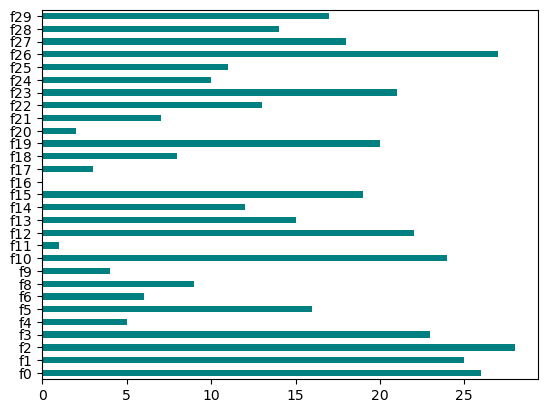

In [15]:
feat_importances = pd.Series(ranks, model.nconst_feature_names)
feat_importances.plot(kind="barh", color="teal")

In [16]:
model2 = UBaymodel(data=data,
                 target = labels,
                 feat_names = [],
                 weights = [0.01],
                 M = 30, random_state=10,
                 method=[ "mrmr"],
                 nr_features = 4,
                 constraints=constraints)
model2.train()

(     0
 f0   1
 f1   0
 f2   0
 f3   1
 f4   0
 f5   0
 f6   0
 f7   0
 f8   1
 f9   0
 f10  0
 f11  0
 f12  0
 f13  1
 f14  0
 f15  0
 f16  0
 f17  0
 f18  0
 f19  0
 f20  0
 f21  0
 f22  0
 f23  0
 f24  0
 f25  0
 f26  0
 f27  0
 f28  0
 f29  0,
 ['f0', 'f3', 'f8', 'f13'])

In [17]:
np.sum(model2.ensemble_matrix, axis=0)

f0     30
f1      0
f2     30
f3     30
f4      0
f5      0
f6      0
f7      0
f8      0
f9      0
f10     0
f11     0
f12     0
f13    30
f14     0
f15     0
f16     0
f17     0
f18     0
f19     0
f20     0
f21     0
f22     0
f23     0
f24     0
f25     0
f26     0
f27     0
f28     0
f29     0
dtype: object